In [ ]:
!pip3 install snscrape
!pip3 install pandas
!pip3 install nltk
!pip3 install metaplotlib
!pip3 install seaborn
!pip3 install Sastrawi
!pip3 install swifter
!pip3 install wordcloud
!pip3 install pandas_bokeh

In [2]:
import re
import os
import string
import pandas as pd
import pandas_bokeh

# import word_tokenize & FreqDist from NLTK
import nltk
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
#nltk.download('punkt')
#nltk.download('stopwords')

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [ ]:
datatweet = pd.read_excel('olah_data_.xlsx', sheet_name='Sheet1')
#datatweet = pd.read_excel('olah_data_.xlsx', sheet_name='Sheet1')
datatweet.head()

In [ ]:
def cleaning_tweet(tweet):
    # Tahap-1: Non-ascii
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    # Tahap-2: URLs
    tweet = re.sub(r'http[s]?\:\/\/.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+',' ', tweet)
    tweet = re.sub(r'pic.twitter.com?.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+',' ', tweet)
    # Tahap-3: mentions
    tweet = re.sub(r'\@([\w]+)',' ', tweet)
    # Tahap-4_alt-2: konversi tagar ke kalimat (pemisahan string berdasarkan huruf kapital)**
    tweet = re.sub(r'((?<=[a-z])[A-Z]|[A-Z](?=[a-z]))', ' \\1', tweet)
    # Tahap-5: simbol
    tweet = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', tweet)
    # Tahap-6: angka
    tweet = re.sub(r'[0-9]+','', tweet)
    # Tahap-7: koreksi duplikasi tiga karakter beruntun atau lebih (contoh. yukkk)
    tweet = re.sub(r'([a-zA-Z])\1\1','\\1', tweet)
    # Tahap-8: spasi ganda (atau lebih) menjadi satu spasi
    tweet = re.sub(' +', ' ', tweet)
    # Tahap-9: spasi di awal dan akhir kalimat
    tweet = re.sub(r'^[ ]|[ ]$','', tweet)
    # Tahap-10: konversi ke karakter huruf kecil
    tweet = tweet.lower()
    return tweet

datatweet['clean_tweet'] = datatweet['content'].apply(cleaning_tweet)
datatweet.head()

In [ ]:
additional_stopwords = ["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'p', 'hai', 'a', 'wp', 'ayo','kak','ph','tks','terkait','kakak','silakan','tsb',
                       'orang','rp']

with open('stopwords.txt', 'r') as file:
    stopwords_bahasa = file.read().splitlines()

stopwords_bahasa.extend(additional_stopwords)

def remove_stopwords(text, stopwords_list):
    stop_words = set(stopwords_list)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_tokens)
    
    
datatweet['stop_clean_tweet'] = datatweet['content'].apply(lambda x: remove_stopwords(x, stopwords_bahasa))
datatweet

In [ ]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

datatweet['tokenize'] = datatweet['stop_clean_tweet'].apply(word_tokenize_wrapper)
datatweet.head()

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in datatweet['tokenize']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

datatweet['stemmed'] = datatweet['tokenize'].swifter.apply(get_stemmed_term)

In [ ]:
datatweet.head()

In [ ]:
datatweet.to_excel("olah_data_fix.xlsx")  

In [ ]:
datatweet = pd.read_excel('olah_data_fix.xlsx', sheet_name='Sheet1')
datatweet.head()

In [ ]:
datatweet['untokenized'] = datatweet['stemmed_eng'].apply(cleaning_tweet)
datatweet.head()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

datatweet['scores'] = datatweet['untokenized'].apply(lambda review: analyzer.polarity_scores(review))
datatweet['compound']  = datatweet['scores'].apply(lambda score_dict: score_dict['compound'])
def parse_values(x):
    if x >= 0.5:
       return "Positif"
    elif x <= -0.5:
       return "Negatif"
    else :
       return "Neutral"
datatweet['sentiment'] = datatweet['compound'].apply(parse_values)
datatweet

In [ ]:
datatweet.to_excel("result.xlsx")  

In [ ]:
result = datatweet.groupby(['sentiment'])['sentiment'].count()
print(result)

In [ ]:
result.plot(
    kind='pie', y='', autopct='%1.0f%%')

In [ ]:
result.plot_bokeh(
    kind='bar',
    xlabel='Sentiment',
    ylabel='Jumlah')

In [ ]:
result.plot(kind='pie', x='', y='', autopct='%1.0f%%')

In [3]:
datatweet = pd.read_excel('result.xlsx', sheet_name='Sheet1')
datatweet.head()

,Unnamed: 0,datetime,date,username,content,clean_tweet,stop_clean_tweet,tokenize,stemmed,stemmed_eng,untokenized,scores,compound,sentiment
0,0,2022-01-01 01:18:37+00:00,2022-01-01,kompascom,Program tax amnesty ini berlangsung selama 6 b...,program tax amnesty ini berlangsung selama bul...,program tax amnesty tanggal juni,"[program, tax, amnesty, tanggal, juni]","[program, tax, amnesty, tanggal, juni]","[program, Tax, Amnesty, Date, June]",program tax amnesty date june,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,1,2022-01-01 01:30:04+00:00,2022-01-01,KontanNews,Simak Potensi Pasar SBN Saat Tax Amnesty Jilid...,simak potensi pasar sbn saat tax amnesty jilid...,simak potensi pasar sbn tax amnesty jilid ii d...,"[simak, potensi, pasar, sbn, tax, amnesty, jil...","[simak, potensi, pasar, sbn, tax, amnesty, jil...","[see, potential, market, SBN, Tax, Amnesty, Vo...",see potential market sbn tax amnesty volume ii...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,2,2022-01-01 01:44:26+00:00,2022-01-01,tanyaPAJAK,Selamat Tahun Baru 2022.\nSelamat Datang Era U...,selamat tahun baru \n selamat datang era uu hpp,selamat selamat era uu hpp,"[selamat, selamat, era, uu, hpp]","[selamat, selamat, era, uu, hpp]","[Congratulations, Congratulations, Era, Uu, HPP]",congratulations congratulations era uu hpp,"{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'comp...",0.8316,Positif
3,3,2022-01-01 02:09:15+00:00,2022-01-01,pajaklangsa,Penerapan penghasilan bruto yang tidak dikenai...,penerapan penghasilan bruto yang tidak dikenai...,penerapan penghasilan bruto dikenai pajak umkm...,"[penerapan, penghasilan, bruto, dikenai, pajak...","[terap, hasil, bruto, kena, pajak, umkm, uu, h...","[Therapy, result, gross, hit, tax, UMKM, Law, ...",therapy result gross hit tax umkm law hpp func...,"{'neg': 0.175, 'neu': 0.565, 'pos': 0.26, 'com...",0.1280,Positif
4,4,2022-01-01 03:02:01+00:00,2022-01-01,priyantarno,"Sudah tanggal 01 januari 2022, ayoo yg merasa ...",sudah tanggal januari ayoo yg merasa ada harta...,tanggal januari ayoo harta bersumber penghasil...,"[tanggal, januari, ayoo, harta, bersumber, pen...","[tanggal, januari, ayoo, harta, sumber, hasil,...","[Dates, January, Ayoo, Treasure, Source, Resul...",dates january ayoo treasure source results rep...,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.2960,Positif


In [23]:
additional_stopwords = ["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'p', 'hai', 'a', 'wp', 'ayo','kak','ph','tks','terkait','kakak','silakan','tsb',
                       'orang','rp','ii','b','kena']

with open('stopwords.txt', 'r') as file:
    stopwords_bahasa = file.read().splitlines()

stopwords_bahasa.extend(additional_stopwords)

def remove_stopwords(text, stopwords_list):
    stop_words = set(stopwords_list)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_tokens)
    
    
datatweet['stop_clean_tweet'] = datatweet['clean_tweet'].apply(lambda x: remove_stopwords(x, stopwords_bahasa))
datatweet.head()

,Unnamed: 0,datetime,date,username,content,clean_tweet,stop_clean_tweet,tokenize,stemmed,stemmed_eng,untokenized,scores,compound,sentiment
0,0,2022-01-01 01:18:37+00:00,2022-01-01,kompascom,Program tax amnesty ini berlangsung selama 6 b...,program tax amnesty ini berlangsung selama bul...,program tax amnesty tanggal juni,"[program, tax, amnesty, tanggal, juni]","[program, tax, amnesty, tanggal, juni]","[program, Tax, Amnesty, Date, June]",program tax amnesty date june,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,1,2022-01-01 01:30:04+00:00,2022-01-01,KontanNews,Simak Potensi Pasar SBN Saat Tax Amnesty Jilid...,simak potensi pasar sbn saat tax amnesty jilid...,simak potensi pasar sbn tax amnesty jilid dibe...,"[simak, potensi, pasar, sbn, tax, amnesty, jil...","[simak, potensi, pasar, sbn, tax, amnesty, jil...","[see, potential, market, SBN, Tax, Amnesty, Vo...",see potential market sbn tax amnesty volume ii...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,2,2022-01-01 01:44:26+00:00,2022-01-01,tanyaPAJAK,Selamat Tahun Baru 2022.\nSelamat Datang Era U...,selamat tahun baru \n selamat datang era uu hpp,selamat selamat era uu hpp,"[selamat, selamat, era, uu, hpp]","[selamat, selamat, era, uu, hpp]","[Congratulations, Congratulations, Era, Uu, HPP]",congratulations congratulations era uu hpp,"{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'comp...",0.8316,Positif
3,3,2022-01-01 02:09:15+00:00,2022-01-01,pajaklangsa,Penerapan penghasilan bruto yang tidak dikenai...,penerapan penghasilan bruto yang tidak dikenai...,penerapan penghasilan bruto dikenai pajak umkm...,"[penerapan, penghasilan, bruto, dikenai, pajak...","[terap, hasil, bruto, kena, pajak, umkm, uu, h...","[Therapy, result, gross, hit, tax, UMKM, Law, ...",therapy result gross hit tax umkm law hpp func...,"{'neg': 0.175, 'neu': 0.565, 'pos': 0.26, 'com...",0.1280,Positif
4,4,2022-01-01 03:02:01+00:00,2022-01-01,priyantarno,"Sudah tanggal 01 januari 2022, ayoo yg merasa ...",sudah tanggal januari ayoo yg merasa ada harta...,tanggal januari ayoo harta bersumber penghasil...,"[tanggal, januari, ayoo, harta, bersumber, pen...","[tanggal, januari, ayoo, harta, sumber, hasil,...","[Dates, January, Ayoo, Treasure, Source, Resul...",dates january ayoo treasure source results rep...,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",0.2960,Positif


In [33]:
from nltk.collocations import BigramCollocationFinder

def bigram(words):
    # Generate bigrams
    finder = BigramCollocationFinder.from_words(words)

    # Calculate bigram frequencies
    bigram_frequencies = finder.ngram_fd.items()

    # Sort bigrams by frequency in descending order
    sorted_bigrams = sorted(bigram_frequencies, key=lambda x: x[1], reverse=True)

    # Extract the top 50 bigrams
    top_50_bigrams = sorted_bigrams[:50]

    # Print the top 50 bigrams and their frequencies
    for bigram, frequency in top_50_bigrams:
        print(f"{bigram[0]} {bigram[1]}: {frequency}")


all_words = ' '.join([datatweet for datatweet in datatweet["stop_clean_tweet"].astype('str')])
all_words = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', all_words)
token_pharse = token_space.tokenize(all_words)
frequency = nltk.FreqDist(token_pharse)
df_freq = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
df_freq = df_freq.nlargest(columns = "Frequency", n = 30)

top50_bigrams_doc1 = bigram(all_words)

a n: 40812
  p: 38962
n  : 35352
n g: 19747
e n: 17819
a  : 17557
p a: 17011
k a: 16982
i  : 15736
a s: 15581
p e: 15464
t a: 15339
e r: 14734
  s: 14620
a k: 14514
a r: 13098
u  : 12634
  u: 12504
p p: 12417
  d: 12262
r a: 12191
k  : 12038
s a: 11942
  k: 11433
a t: 11320
j a: 11271
  t: 11044
p  : 10901
d i: 10683
l a: 10682
  m: 10327
a j: 10056
u u: 9867
  h: 9699
y a: 9664
  a: 9393
  b: 9243
s i: 9237
a l: 9195
t  : 9006
u n: 8700
a m: 8409
l  : 7984
m e: 7901
t u: 7877
r i: 7743
k e: 7649
h a: 7498
e s: 7435
b a: 7164


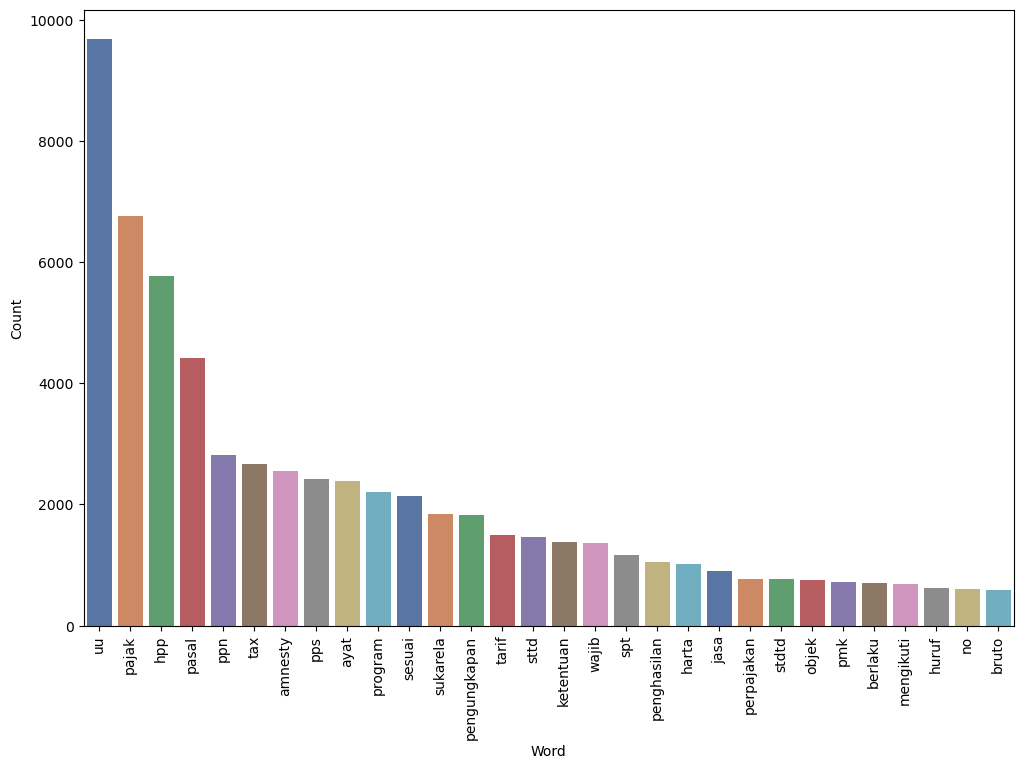

In [37]:
token_space = tokenize.WhitespaceTokenizer()

def counter(Tweet, column, quantity):
    all_words = ' '.join([Tweet for Tweet in Tweet[column].astype('str')])
    all_words = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', all_words)
    token_pharse = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_pharse)
    df_freq = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
    df_freq = df_freq.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_freq, x = "Word", y = "Frequency", palette = "deep")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

  
counter(datatweet, "stop_clean_tweet", 30)

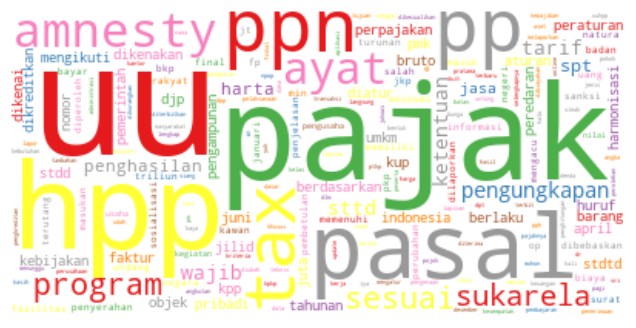

In [38]:
def generate_wordcloud(text):
    wordcloud = WordCloud(background_color="White", colormap='Set1', collocations=False,).generate(text)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Generate word cloud from 'clean_text' column
generate_wordcloud(" ".join(datatweet.stop_clean_tweet))